# Binary Search Tree

Based on information from.

- https://www.cs.cmu.edu/~adamchik/15-121/lectures/Trees/trees.html
- http://cslibrary.stanford.edu/110/BinaryTrees.html

Some text from these sites is also copied, but all python code is original work.

## Basic Binary Tree

A binary tree is a data structure that contains some data as well as a pointer to a left and a right binary tree (recursive definition).

In [75]:
class BinaryTree:
    def __init__(self, data = None, left = None, right = None):
        self.data = data;
        self.left = left;
        self.right = right;

## Visualization

The first thing we'll do is write a `render_tree` function that takes a `BinaryTree` and returns an SVG visualization for it.

In [76]:
import graphviz

def render_tree(tree):
    dot = graphviz.Digraph()
    # render_tree could be written as a recursive function, but using a loop and managing our own stack
    # is superior here, as we don't have to write awkward special-case logic for the top level call that
    # needs to initialize the Digraph and return an svg.
    stack = [tree]
    emptyID = 0
    while len(stack) > 0:
        head = stack.pop(0)
        dot.node('{}'.format(head.data))
        if not (head.left or head.right):
            continue
        for child in [head.left, head.right]:
            if child is None:
                emptyID += 1
                childData = 'empty{}'.format(emptyID)
                dot.node('{}'.format(childData), style='invisible')
            else:
                childData = child.data
                stack.append(child)
            dot.edge('{}'.format(head.data), '{}'.format(childData))
    
    return dot._repr_svg_()
# _repr_svg_ is used by Jupyter notebook when deciding how to display a BinaryTree cell value. 
BinaryTree._repr_svg_ = render_tree

Let's test our tree rendering, below is a trivial binary tree containing a single value:

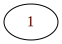

In [77]:
BinaryTree(1)

Ok, let's go crazy and try a bigger tree. We'll also use this tree for our other examples below.

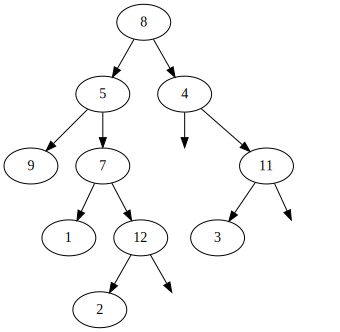

In [78]:
example = BinaryTree(
    8,
    BinaryTree(
        5,
        BinaryTree(9),
        BinaryTree(
            7,
            BinaryTree(1),
            BinaryTree(
                12,
                BinaryTree(2),
            ),
        ),
    ),
    BinaryTree(
        4,
        None,
        BinaryTree(
            11,
            BinaryTree(3),
        ),
    ),
)
example

## Traversal

A traversal is a process that visits all the nodes in the tree. Since a tree is a nonlinear data structure, there is no unique traversal. We will consider several traversal algorithms with we group in the following two kinds:

- depth-first traversal
- breadth-first traversal

There are three different types of depth-first traversals:

- PreOrder traversal - visit the parent first and then left and right children
- InOrder traversal - visit the left child, then the parent and the right child
- PostOrder traversal - visit left child, then the right child and then the parent

There is only one kind of breadth-first traversal--the level order traversal. This traversal visits nodes by levels from top to bottom and from left to right.

In [79]:
def pre_order(tree):
    if not tree:
        return
    yield tree
    yield from pre_order(tree.left)
    yield from pre_order(tree.right)

def in_order(tree):
    if not tree:
        return
    yield from in_order(tree.left)
    yield tree
    yield from in_order(tree.right)

def post_order(tree):
    if not tree:
        return
    yield from post_order(tree.left)
    yield from post_order(tree.right)
    yield tree

def level_order(tree):
    stack = [tree]
    while stack:
        tree = stack.pop(0)
        if tree is None:
            continue
        yield tree
        stack.append(tree.left)
        stack.append(tree.right)

def print_tree(tree, method):
    print(list((node.data for node in method(tree))))

In [80]:
print_tree(example, pre_order)
print_tree(example, in_order)
print_tree(example, post_order)
print_tree(example, level_order)

[8, 5, 9, 7, 1, 12, 2, 4, 11, 3]
[9, 5, 1, 7, 2, 12, 8, 4, 3, 11]
[9, 1, 2, 12, 7, 5, 3, 11, 4, 8]
[8, 5, 4, 9, 7, 11, 1, 12, 3, 2]


## Properties

The height of a node is the number of edges from the node to the deepest leaf.

In [81]:
def height(tree):
    if tree and (tree.left or tree.right):
        return max(height(tree.left), height(tree.right)) +1
    return 0

In [82]:
print(height(BinaryTree(1)))
print(height(example))

0
4


A full binary tree.is a binary tree in which each node has exactly zero or two children.

In [83]:
def full(tree):
    if not tree:
        return True
    elif bool(tree.left) != bool(tree.right):
        return False
    else:
        return full(tree.left) and full(tree.right)

In [84]:
print(full(BinaryTree(1)))
print(full(BinaryTree(1, BinaryTree(2), BinaryTree(3))))
print(full(BinaryTree(1, BinaryTree(3))))
print(full(BinaryTree(1, None, BinaryTree(3))))
print(full(example))

True
True
False
False
False


A complete binary tree is a binary tree, which is completely filled, with the possible exception of the bottom level, which is filled from left to right.

In [85]:
def complete(tree):
    bottom = tree.left 

## Binary Search Tree

In [86]:
def insert(tree, data):
    if tree.data is None:
        tree.data = data
    elif data < tree.data:
        if not tree.left:
            tree.left = BinaryTree(data)
        else:
            insert(tree.left, data)
    elif data > tree.data:
        if not tree.right:
            tree.right = BinaryTree(data)
        else:
            insert(tree.right, data)

In [87]:
def bst(items):
    t = BinaryTree()
    for data in items:
        insert(t, data)
    return t
        

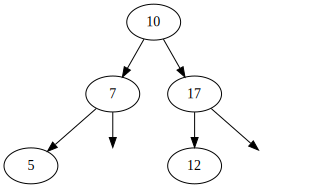

In [88]:
t = BinaryTree(10)
insert(t, 7)
insert(t, 5)
insert(t, 17)
insert(t, 12)
t

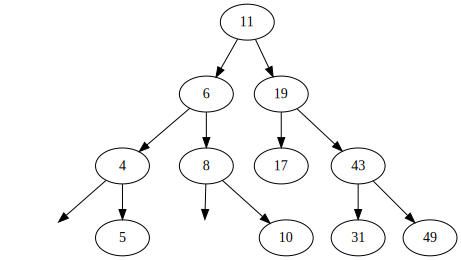

In [89]:
t = BinaryTree()
for data in [11, 6, 8, 19, 4, 10, 5, 17, 43, 49, 31]:
    insert(t, data)
t

In [90]:
def search(tree, data):
    if tree is None:
        return False
    elif tree.data == data:
        return True
    elif data < tree.data:
        return search(tree.left, data)
    else:
        return search(tree.right, data)
    return False

In [91]:
for data in [11, 6, 8, 19, 4, 10, 5, 17, 43, 49, 31]:
    print(search(t, data))
print(search(t, 492))

True
True
True
True
True
True
True
True
True
True
True
False


Unfortunately, a binary serch tree can degenerate to a linked list, reducing the search time to O(n).

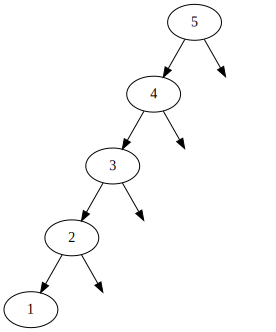

In [92]:
t = BinaryTree()
for data in [5, 4, 3, 2, 1]:
    insert(t, data)
t

In [93]:
def clone(tree):
    if tree is None:
        return None
    c = BinaryTree(tree.data)
    c.left = clone(tree.left)
    c.right = clone(tree.right)
    return c

In [110]:
def delete(tree, data):
    if tree is None:
        return tree
    if data < tree.data:
        tree.left = delete(tree.left, data)
    elif data > tree.data:
        tree.right = delete(tree.right, data)
    else:
        if tree.left is None:
            return tree.right
        elif tree.right is None:
            return tree.left
        else:
            swap = tree.left
            while swap.right:
                swap = swap.right
            tree.data = swap.data
            tree.left = delete(tree.left, tree.data)
    return tree

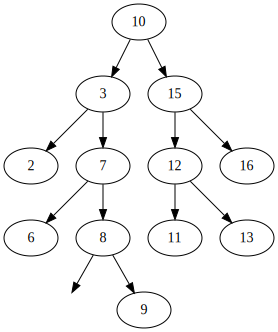

In [111]:
t = bst([10, 3, 2, 7, 8, 6, 9, 15, 12, 13, 11, 16])
t

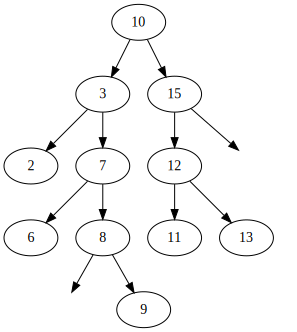

In [112]:
delete(t, 16)

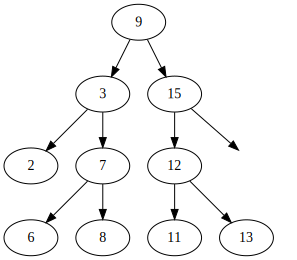

In [113]:
delete(t, 10)

In [114]:
bt = bst([10])
delete(bt, 10)